# ***House Price Prediction***

## Small, Simple Dataset

### Import the required Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

### Import the dataset

In [75]:
df = pd.read_csv('homePrices.csv')
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


### Plot a 'Scatter Plot' for the imported dataset

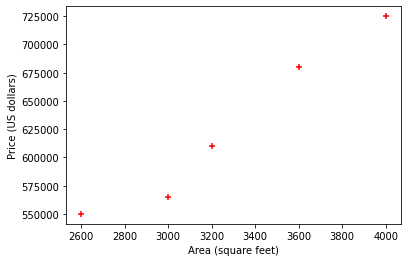

In [76]:
plt.xlabel('Area (square feet)')
plt.ylabel('Price (US dollars)')
plt.scatter(df['area'], df['price'], marker='+', color='red')

### Creating a linear regression object and train the model according to the acquired data points
* linear_model.LinearRegression() => method in sklearn, creates a LinearRegression object
* fit() => train the linear regression model using the available data points

In [77]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])

LinearRegression()

### Predicting the prices for new areas

In [78]:
# Predict the price of a house whose area is 3300 square feet
reg.predict([[3300]])

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [79]:
# Predict the price of a house whose area is 3300 square feet
reg.predict([[5000]])

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

y = mx + b
m => coeff_
b => intercept_


In [80]:
print('m = ', reg.coef_)
print('b = ', reg.intercept_)

m =  [135.78767123]
b =  180616.43835616432


In [81]:
print('For x = 3300,\n\t y = mx + b = 3300m + b = ', 3300*135.78767123 + 180616.43835616432)
print('For x = 5000,\n\t y = mx + b = 5000m + b = ', 5000*135.78767123 + 180616.43835616432)

For x = 3300,
	 y = mx + b = 3300m + b =  628715.7534151643
For x = 5000,
	 y = mx + b = 5000m + b =  859554.7945061643


#### Predict prices for areas stored in a CSV file

In [82]:
d = pd.read_csv('area.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [83]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

### To add the predicted prices to the DataFrame

In [84]:
p = reg.predict(d)

In [85]:
d['prices'] = p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


### Export the predictions to another csv file

In [86]:
# With Indexing
d.to_csv('prediction_Indexed.csv')

In [87]:
# Without Indexing
d.to_csv('prediction.csv', index=False)

### Plotting the regression line

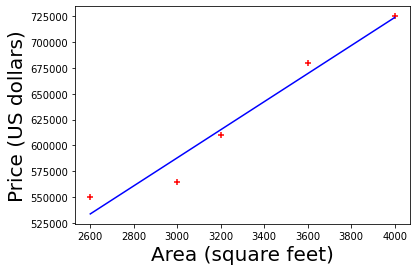

In [88]:
plt.xlabel('Area (square feet)', fontsize=20)
plt.ylabel('Price (US dollars)', fontsize=20)
plt.scatter(df['area'], df['price'], marker='+', color='red')
plt.plot(df['area'], reg.predict(df[['area']]), color='blue')